In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


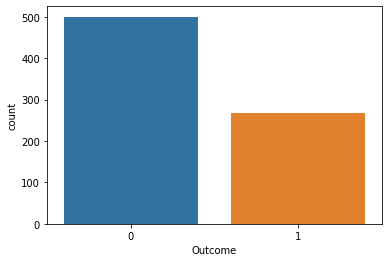

In [ ]:
import seaborn as sns
sns.countplot(df['Outcome'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
X=df.drop("Outcome",axis=1)
y=df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

In [ ]:

X_train.shape, X_test.shape

((537, 8), (231, 8))

In [ ]:

X_train.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.133796,0.135395,-0.087961,-0.084711,-0.020281,-0.046851,0.534801
Glucose,0.133796,1.000000,0.152033,0.060085,0.333523,0.242622,0.125547,0.282401
BloodPressure,0.135395,0.152033,1.000000,0.204938,0.070660,0.284280,0.060239,0.220459
SkinThickness,-0.087961,0.060085,0.204938,1.000000,0.428738,0.415556,0.181830,-0.156725
Insulin,-0.084711,0.333523,0.070660,0.428738,1.000000,0.188615,0.192464,-0.062404
BMI,-0.020281,0.242622,0.284280,0.415556,0.188615,1.000000,0.153093,0.001750
DiabetesPedigreeFunction,-0.046851,0.125547,0.060239,0.181830,0.192464,0.153093,1.000000,0.042145
Age,0.534801,0.282401,0.220459,-0.156725,-0.062404,0.001750,0.042145,1.000000


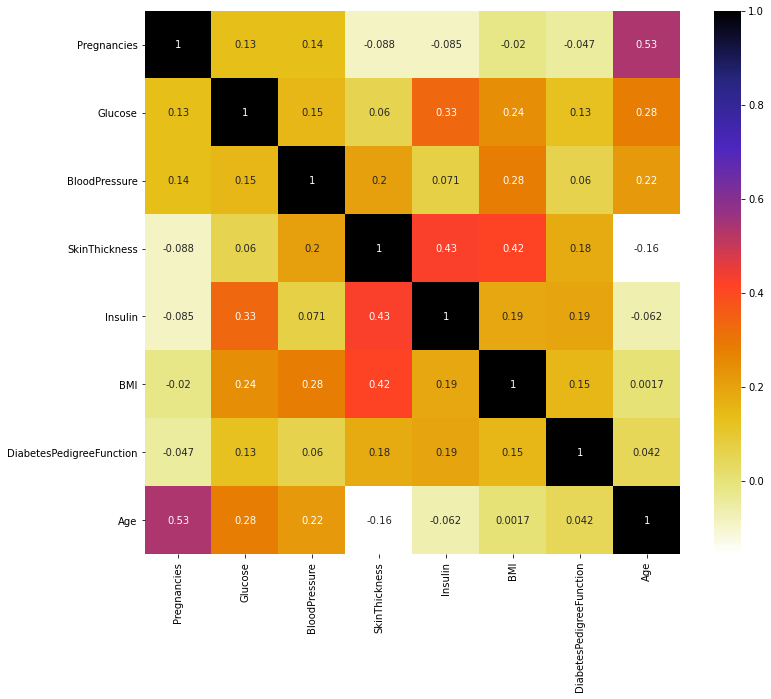

In [ ]:

import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
X_train.columns# 8 columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr 

In [ ]:
corr_features=correlation(X_train,0.4)
len(set(corr_features))

3

In [ ]:
corr_features

{'Age', 'BMI', 'Insulin'}

In [ ]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model1.score(X_train,y_train)

0.7597765363128491

In [ ]:

from sklearn.tree import DecisionTreeClassifier
model2= DecisionTreeClassifier()
model2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model2.score(X_train,y_train)

1.0

In [ ]:
import pickle
pickle.dump(model1,open('model1.pkl','wb'))

In [ ]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'DiabetesPedigreeFunction'],
      dtype='object')

In [ ]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
print(model1.predict([[1,83,68,0,0.624]]))

[0]


In [ ]:
import pickle
pickle.dump(model1,open('model1.pkl','wb'))


In [ ]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction
580,0,151,90,46,0.371
418,1,83,68,0,0.624
764,2,122,70,27,0.340
363,4,146,78,0,0.520
757,0,123,72,0,0.258


In [ ]:
y_train.head()

580    1
418    0
764    0
363    1
757    1
Name: Outcome, dtype: int64